Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Amount that heard the siren by age age
18    63
19    71
20    62
21    84
22    69
      ..
79    43
80    34
81    48
82    35
83    43
Length: 66, dtype: int64
Amount that did not hear the siren by age  age
20     9
21     6
22     5
23     7
24     9
      ..
84    17
85    31
86    22
87    21
88    17
Length: 69, dtype: int64


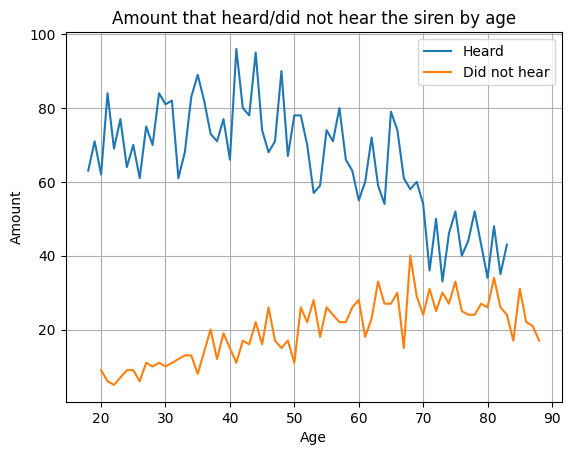

In [3]:
#2
data = pd.read_csv('siren_data_train.csv')
data = data.dropna()

#print(data.head())


#For every age see how many who heard
hear_by_age = data[data['heard'] == 1].groupby('age').size()

print("Amount that heard the siren by age", hear_by_age)

#For every age see hom many how did not hear
not_hear_by_age = data[data['heard'] == 0].groupby('age').size()

print("Amount that did not hear the siren by age ",not_hear_by_age)



plt.plot(hear_by_age.index, hear_by_age.values, label='Heard')
plt.plot(not_hear_by_age.index, not_hear_by_age.values, label='Did not hear')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Amount that heard/did not hear the siren by age')
plt.legend()
plt.grid(True)
plt.show()

Accuracy on training set: 0.780


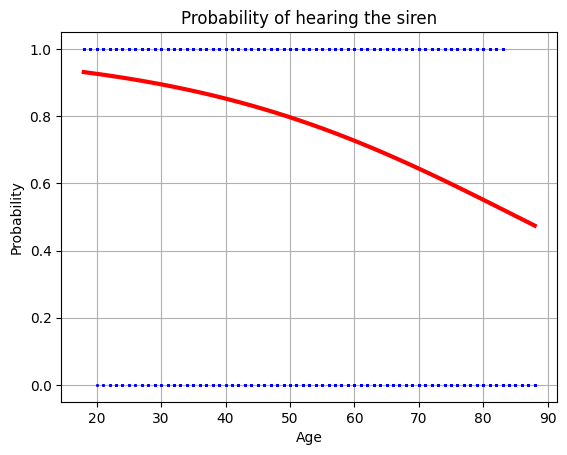

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data['age'].values.reshape(-1,1)
y = data['heard'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

plt.scatter(X_test, y_test, zorder=20, color='blue', s=1)

x_sequence = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

plt.plot(x_sequence, logreg.predict_proba(x_sequence)[:,1], color='red', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of hearing the siren')
plt.grid(True)
plt.show()


Mean angle for the ones who heard 94.86729733007638
Mean angle for the ones who did not hear 94.86729733007638
piss [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180.]


C:\Users\gabbe\AppData\Local\Temp\ipykernel_6596\3186392799.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_heard_by_interval = data[data['heard'] == 1].groupby('angle_interval')['heard'].count()
C:\Users\gabbe\AppData\Local\Temp\ipykernel_6596\3186392799.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_not_heard_by_interval = data[data['heard'] == 0].groupby('angle_interval')['heard'].count()


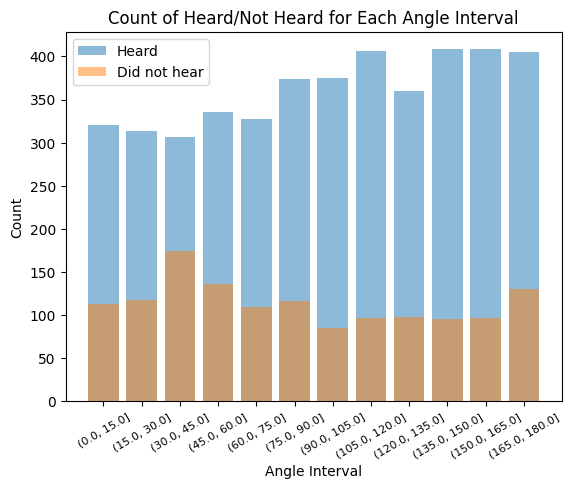

In [20]:
#3 Does the direction to the nearest horn affect weather a person hears the siren or not?


mean_angle_heard = data[data['heard'] == 1]['near_angle'].abs().mean()
print("Mean angle for the ones who heard", mean_angle_heard)

mean_angle_not_heard = data[data['heard'] == 0]['near_angle'].abs().mean()
print("Mean angle for the ones who did not hear", mean_angle_heard)


# Define the angle intervals
intervals = np.arange(0, data['near_angle'].abs().max() + 15, 15)
print("piss", intervals)

# Categorize the 'near_angle' data into the defined intervals
data['angle_interval'] = pd.cut(data['near_angle'].abs(), intervals)

# Calculate the mean 'heard' value for each interval
mean_heard_by_interval = data[data['heard'] == 1].groupby('angle_interval')['heard'].count()
mean_not_heard_by_interval = data[data['heard'] == 0].groupby('angle_interval')['heard'].count()

# Plot the results
plt.bar(mean_heard_by_interval.index.astype(str), mean_heard_by_interval.values, alpha=0.5, label='Heard')
plt.bar(mean_not_heard_by_interval.index.astype(str), mean_not_heard_by_interval.values, alpha=0.5, label='Did not hear')
plt.xlabel('Angle Interval')
plt.ylabel('Count')
plt.title('Count of Heard/Not Heard for Each Angle Interval')
plt.xticks(fontsize=8, rotation=30)
plt.legend()
plt.show()




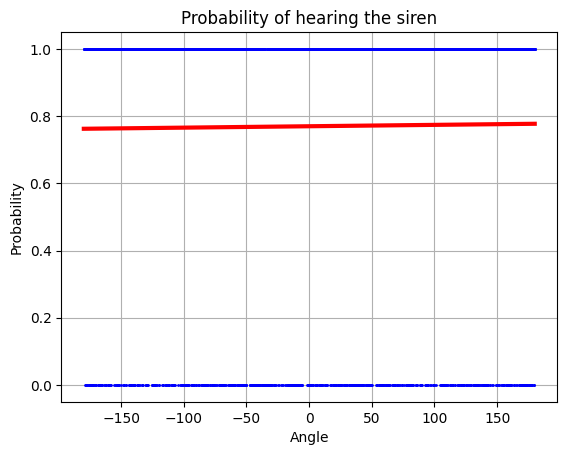

In [8]:
X = data['near_angle'].values.reshape(-1,1)
y = data['heard'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

plt.scatter(X_test, y_test, zorder=20, color='blue', s=1)

x_sequence = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

plt.plot(x_sequence, logreg.predict_proba(x_sequence)[:,1], color='red', linewidth=3)
plt.xlabel('Angle')
plt.ylabel('Probability')
plt.title('Probability of hearing the siren')
plt.grid(True)
plt.show()


In [23]:
#Evaluation
spearman = data['near_angle'].corr(data["heard"],method='spearman')
print("Spearman correlation between angle and heard", spearman)

Chi-Square Statistic: 79.01638384494132
p-value: 2.285938548982378e-12
Spearman correlation between angle and heard 0.006705393316314735
